#### Package

In [1]:
import numpy as np
import cv2
import hw202Func as fc
import matplotlib.pyplot as plt

In [2]:
def readimg(path):
#    imge = cv2.imread(path,cv2.IMREAD_UNCHANGED)
    imge = cv2.imread(path)
    imge = cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
    return imge


## Part. A

In [3]:
#%% =============================================================================
#  A. LOADING PICTURE & POINTS
# =============================================================================
path_A = './data/img_2in1.jpg'
path_B = './data/img_1.jpg'
path_C = './data/img_2.jpg'

pts_A_1 = np.load('./data/Point_2in1_1.npy')
pts_A_2 = np.load('./data/Point_2in1_2.npy')
pts_B = np.load('./data/Point_img1.npy')
pts_C = np.load('./data/Point_img2.npy')


## Part. B

In part B, I am going to switch two image region I assigned in a photo I took by using Foward Switch & Backward Switch.  

======== original image =====


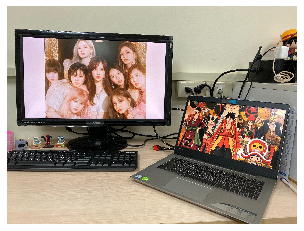

======== Forward Left to Right transformed image =====
homography matrix:
 [[ 1.22059202e-01 -2.66595075e-01  2.48690183e+03]
 [-1.59232173e-01  4.23911657e-01  1.10116550e+03]
 [-1.35735045e-04 -5.01421739e-05  1.00000000e+00]]


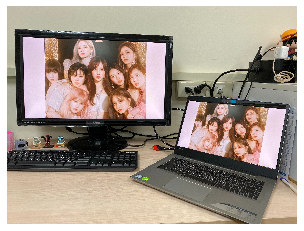

======== Forward Right to Left transformed image =====
homography matrix:
 [[ 5.15644125e+01  1.52711346e+01 -1.45051678e+05]
 [ 1.05097158e+00  4.94649761e+01 -5.70827883e+04]
 [ 7.05179588e-03  4.55310958e-03  1.00000000e+00]]


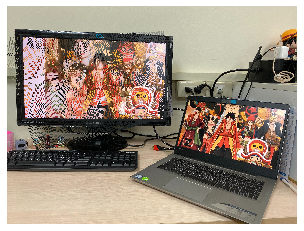

=================== (Forward)Switch !!!! ====================


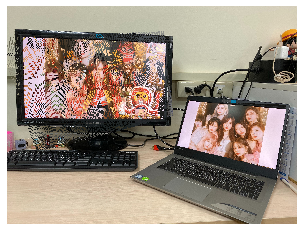

========Backward Left to Right transformed image =====


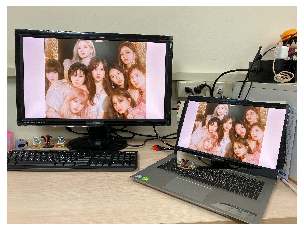

========Backward Right to Left transformed image =====


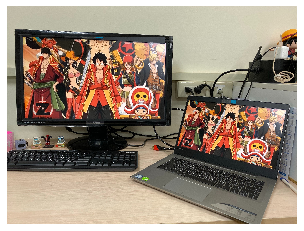

=================== (Backward) Switch !!!! ====================


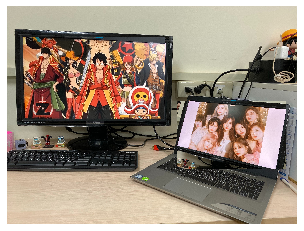

In [4]:
#%% =============================================================================
#   B. two objects in same image
# =============================================================================
# forward switch
imgA = readimg(path_A)
print('======== original image =====')
plt.imshow(imgA)
plt.axis('off')
plt.show()
##(i) left to right
print('======== Forward Left to Right transformed image =====')
H_A = fc.homography(pts_A_1,pts_A_2)
print('homography matrix:\n',H_A)
outImg = fc.forward(pts_in =pts_A_1, pts_out = pts_A_2, in_img = imgA, out_img=imgA)
plt.imshow(outImg)
plt.axis('off')
plt.savefig('./results/imgA_forward_L2R.png',dpi=400)
plt.show()

##(ii) right  to left
print('======== Forward Right to Left transformed image =====')
H_A = fc.homography(pts_A_2,pts_A_1)
print('homography matrix:\n',H_A)
outImg2 = fc.forward(pts_in =pts_A_2, pts_out = pts_A_1, in_img = imgA, out_img=imgA)
plt.imshow(outImg2)
plt.axis('off')
plt.savefig('./results/imgA_forward_R2L.png',dpi=400)
plt.show()

##(iii) switch
print('=================== (Forward)Switch !!!! ====================')
tmpCanvas = fc.forward(pts_in =pts_A_1, pts_out = pts_A_2, in_img = imgA, out_img=imgA)
outImg3 = fc.forward(pts_in =pts_A_2, pts_out = pts_A_1, in_img = imgA, out_img=tmpCanvas) 
plt.imshow(outImg3)
plt.axis('off')
plt.savefig('./results/imgA_forward_switch.png',dpi=400)
#plt.savefig('./results/imgA_forward_switch.png',dpi=400)
plt.show()

# backward switch
##(i) left to right
print('========Backward Left to Right transformed image =====')
outImg = fc.backward(pts_in =pts_A_1, pts_out = pts_A_2, in_img = imgA, out_img=imgA)
plt.imshow(outImg)
plt.axis('off')
plt.savefig('./results/imgA_backward_L2R.png',dpi=400)
plt.show()

##(ii) right  to left
print('========Backward Right to Left transformed image =====')
outImg2 = fc.backward(pts_in =pts_A_2, pts_out = pts_A_1, in_img = imgA, out_img=imgA)
plt.imshow(outImg2)
plt.axis('off')
plt.savefig('./results/imgA_backward_R2L.png',dpi=400)
plt.show()

##(iii) switch
print('=================== (Backward) Switch !!!! ====================')
tmpCanvas = fc.backward(pts_in =pts_A_1, pts_out = pts_A_2, in_img = imgA, out_img=imgA)
outImg3 = fc.backward(pts_in =pts_A_2, pts_out = pts_A_1, in_img = imgA, out_img=tmpCanvas) 
plt.imshow(outImg3)
plt.axis('off')
#plt.savefig('D:/Desktop(D)/imgA_backward_switch.png',dpi=400)
plt.savefig('./results/imgA_backward_switch.png',dpi=400)
plt.show()


## Part. C

======== original image =====


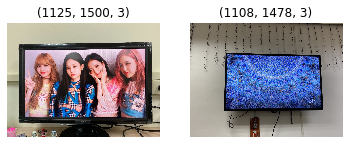

B2C homography matrix:
 [[ 8.60249069e-01 -4.14499506e-02  2.17761285e+02]
 [ 5.26969514e-02  7.37318003e-01  9.78663081e+01]
 [ 8.75173611e-05 -6.22154960e-05  1.00000000e+00]]
C2B homography matrix:
 [[ 1.16803123e+00  4.38389880e-02 -2.58642341e+02]
 [-6.93395539e-02  1.32166878e+00 -1.14247374e+02]
 [-1.06537005e-04  7.83916061e-05  1.00000000e+00]]
========Forward B2C transformed image =====


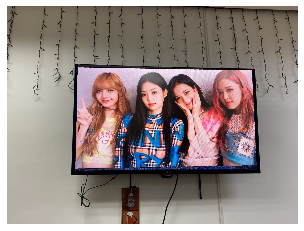

========Forward C2B transformed image =====


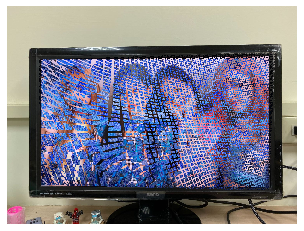

========Backward B2C transformed image =====


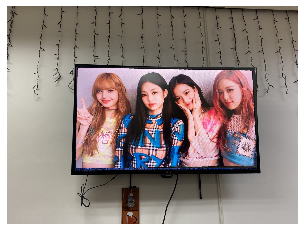

========Backward C2B transformed image =====


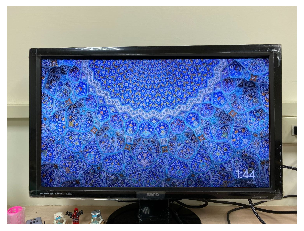

In [5]:

#%% =============================================================================
#   C. objects in different images
# =============================================================================
imgB = readimg(path_B)
imgC = readimg(path_C)
print('======== original image =====')
for i,img in enumerate((imgB,imgC)):       
    plt.subplot(1,2,i+1)
    plt.imshow(img)
    plt.title('{}'.format(str(np.shape(img))))
    plt.axis('off')
plt.show()
# forward switch
##(i) B to C
H_A = fc.homography(pts_B,pts_C)
print('B2C homography matrix:\n',H_A)
H_A = fc.homography(pts_C,pts_B)
print('C2B homography matrix:\n',H_A)
outImg = fc.forward(pts_in =pts_B, pts_out = pts_C, in_img = imgB, out_img=imgC)
##(ii) C  to B
outImg1 = fc.forward(pts_in =pts_C, pts_out = pts_B, in_img = imgC, out_img=imgB)
##(iii) plot
IMG = [outImg,outImg1]
names =['B2C','C2B']
for i,(img,name) in enumerate(zip(IMG,names)):
#    fig = plt.figure()
    print('========Forward {} transformed image ====='.format(name))
    plt.imshow(img)
    plt.axis('off')
    plt.savefig('./results/imgBC_forward_{}.png'.format(name),dpi=400)    
    plt.show()

# backward switch
##(i) B to C
outImg = fc.backward(pts_in =pts_B, pts_out = pts_C, in_img = imgB, out_img=imgC)
##(ii) C  to B
outImg1 = fc.backward(pts_in =pts_C, pts_out = pts_B, in_img = imgC, out_img=imgB)
##(iii) plot
IMG = [outImg,outImg1]
names =['B2C','C2B']
for i,(img,name) in enumerate(zip(IMG,names)):
#    fig = plt.figure()
    print('========Backward {} transformed image ====='.format(name))
    plt.imshow(img)
    plt.axis('off')
    plt.savefig('./results/imgBC_backward_{}.png'.format(name),dpi=400)    
    plt.show()